In [1]:
import mysql.connector
import pandas as pd

# Connect to your MySQL database
conn = mysql.connector.connect(
    host="localhost",     
    user="root",           
    password="123456",
    database="pizzahut" 
)

# Function to run queries and get DataFrame
def run_query(query):
    return pd.read_sql(query, conn)


In [55]:

# Q: Total number of orders
query = """
SELECT COUNT(order_id) AS total_orders
FROM orders;
"""

a = run_query(query)

# Print in table format
print(tabulate(a, headers=["Total Orders"], tablefmt="psql", showindex=False))



+----------------+
|   Total Orders |
|----------------|
|          21350 |
+----------------+


C:\Users\babyd\AppData\Local\Temp\ipykernel_11900\241142180.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)


In [53]:
# Q: Calculate the total revenue generated from pizza sales
query = """
SELECT 
    SUM(orders_details.quantity * pizzas.price) AS revenue
FROM
    orders_details
JOIN
    pizzas ON pizzas.pizza_id = orders_details.pizza_id;
"""

revenue_df = run_query(query)

# Print in table format
print(tabulate(revenue_df, headers=["Total Revenue"], tablefmt="psql", showindex=False))

C:\Users\babyd\AppData\Local\Temp\ipykernel_11900\241142180.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)


+-----------------+
|   Total Revenue |
|-----------------|
|          817860 |
+-----------------+


In [51]:
# Q: Identify the highest-priced pizza
query = """
SELECT 
    pizza_types.name, 
    pizzas.price
FROM 
    pizza_types 
JOIN 
    pizzas ON pizza_types.pizza_type_id = pizzas.pizza_type_id
ORDER BY 
    pizzas.price DESC
LIMIT 1;
"""

highest_priced_pizza = run_query(query)

# Print in table format
print(tabulate(highest_priced_pizza, headers=["Pizza Name", "Price"], tablefmt="psql", showindex=False))

+-----------------+---------+
| Pizza Name      |   Price |
|-----------------+---------|
| The Greek Pizza |   35.95 |
+-----------------+---------+


C:\Users\babyd\AppData\Local\Temp\ipykernel_11900\241142180.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)


In [49]:
# Q: Top 5 most ordered pizzas by quantity
query = """
SELECT 
    pizza_types.name, 
    SUM(orders_details.quantity) AS quantity
FROM
    pizza_types
JOIN
    pizzas ON pizza_types.pizza_type_id = pizzas.pizza_type_id
JOIN
    orders_details ON orders_details.pizza_id = pizzas.pizza_id
GROUP BY 
    pizza_types.name
ORDER BY 
    quantity DESC
LIMIT 5;
"""

top_5_pizzas = run_query(query)

# Print in table format
print(tabulate(top_5_pizzas, headers=["Pizza Name", "Quantity Ordered"], tablefmt="psql", showindex=False))


C:\Users\babyd\AppData\Local\Temp\ipykernel_11900\241142180.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)


+----------------------------+--------------------+
| Pizza Name                 |   Quantity Ordered |
|----------------------------+--------------------|
| The Classic Deluxe Pizza   |               2453 |
| The Barbecue Chicken Pizza |               2432 |
| The Hawaiian Pizza         |               2422 |
| The Pepperoni Pizza        |               2418 |
| The Thai Chicken Pizza     |               2371 |
+----------------------------+--------------------+


In [47]:
# Q: Total quantity of each pizza category ordered
query = """
SELECT 
    pizza_types.category,
    SUM(orders_details.quantity) AS quantity
FROM
    pizza_types
JOIN
    pizzas ON pizza_types.pizza_type_id = pizzas.pizza_type_id
JOIN
    orders_details ON orders_details.pizza_id = pizzas.pizza_id
GROUP BY 
    pizza_types.category
ORDER BY 
    quantity DESC;
"""

category_quantity = run_query(query)

# Print in table format
print(tabulate(category_quantity, headers=["Category", "Total Quantity"], tablefmt="psql", showindex=False))


C:\Users\babyd\AppData\Local\Temp\ipykernel_11900\241142180.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)


+------------+------------------+
| Category   |   Total Quantity |
|------------+------------------|
| Classic    |            14888 |
| Supreme    |            11987 |
| Veggie     |            11649 |
| Chicken    |            11050 |
+------------+------------------+


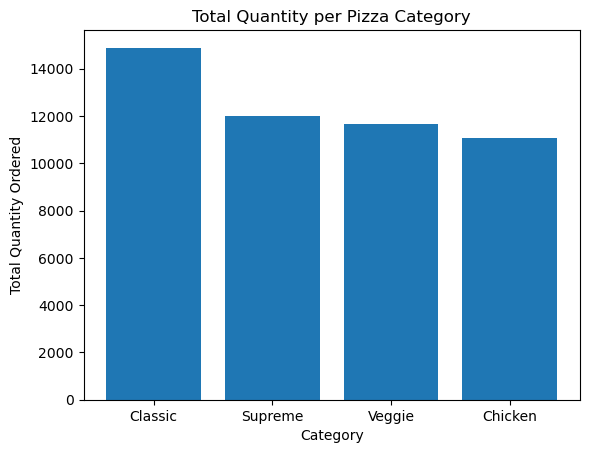

In [21]:
import matplotlib.pyplot as plt

plt.bar(category_quantity['category'], category_quantity['quantity'])
plt.xlabel("Category")
plt.ylabel("Total Quantity Ordered")
plt.title("Total Quantity per Pizza Category")
plt.show()


In [45]:
# Query: Distribution of orders by hour of the day
query = """
SELECT 
    HOUR(order_time) AS hour, 
    COUNT(order_id) AS order_count
FROM
    orders
GROUP BY 
    HOUR(order_time)
ORDER BY 
    hour;
"""

orders_by_hour = run_query(query)

# Print with tabulate format
print(tabulate(orders_by_hour, headers=["Hour", "Order Count"], tablefmt="psql", showindex=False))

+--------+---------------+
|   Hour |   Order Count |
|--------+---------------|
|      9 |             1 |
|     10 |             8 |
|     11 |          1231 |
|     12 |          2520 |
|     13 |          2455 |
|     14 |          1472 |
|     15 |          1468 |
|     16 |          1920 |
|     17 |          2336 |
|     18 |          2399 |
|     19 |          2009 |
|     20 |          1642 |
|     21 |          1198 |
|     22 |           663 |
|     23 |            28 |
+--------+---------------+


C:\Users\babyd\AppData\Local\Temp\ipykernel_11900\241142180.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)


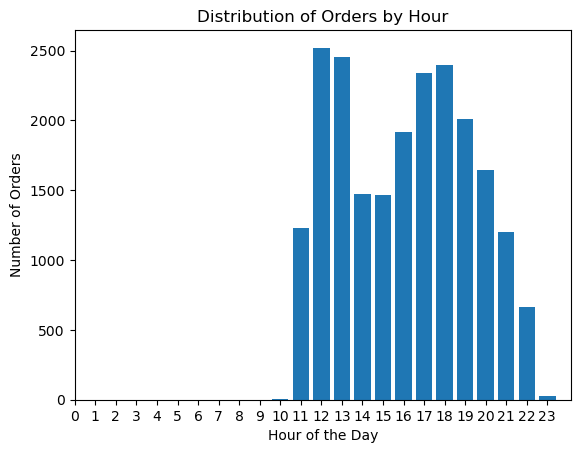

In [25]:

plt.bar(orders_by_hour['hour'], orders_by_hour['order_count'])
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Orders")
plt.title("Distribution of Orders by Hour")
plt.xticks(range(0, 24))
plt.show()


In [43]:
from tabulate import tabulate

# Query to get average pizzas per day
query = """
SELECT 
    AVG(quantity) AS avg_pizzas_per_day
FROM
    (
        SELECT 
            orders.order_date, 
            SUM(orders_details.quantity) AS quantity
        FROM
            orders
        JOIN 
            orders_details 
            ON orders.order_id = orders_details.order_id
        GROUP BY 
            orders.order_date
    ) AS order_quantity;
"""

# Run the query
avg_pizzas_per_day = run_query(query)

# Print in tabulate format with headings
print(tabulate(avg_pizzas_per_day, headers=["avg_pizzas_per_day"], tablefmt="psql", showindex=False))



C:\Users\babyd\AppData\Local\Temp\ipykernel_11900\241142180.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)


+----------------------+
|   avg_pizzas_per_day |
|----------------------|
|              138.475 |
+----------------------+


In [61]:

from tabulate import tabulate

# Q: Percentage contribution of each pizza type to total revenue
query = """
SELECT 
    pt.category,
    SUM(od.quantity * p.price) AS revenue,
    (SUM(od.quantity * p.price) / MAX(total_sales.total)) * 100 AS revenue_percentage
FROM 
    pizza_types AS pt
JOIN 
    pizzas AS p ON pt.pizza_type_id = p.pizza_type_id
JOIN 
    orders_details AS od ON od.pizza_id = p.pizza_id
CROSS JOIN (
    SELECT SUM(od2.quantity * p2.price) AS total
    FROM pizzas AS p2
    JOIN orders_details AS od2 ON od2.pizza_id = p2.pizza_id
) AS total_sales
GROUP BY 
    pt.category
ORDER BY 
    revenue DESC;
"""

revenue_percentage = run_query(query)

# Print in table format with headers and 2 decimals for revenue and percentage
revenue_percentage['revenue'] = revenue_percentage['revenue'].round(2)
revenue_percentage['revenue_percentage'] = revenue_percentage['revenue_percentage'].round(2)

print(tabulate(revenue_percentage, headers=["Category", "Revenue", "Revenue %"], tablefmt="psql", showindex=False))


C:\Users\babyd\AppData\Local\Temp\ipykernel_11900\241142180.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)


+------------+-----------+-------------+
| Category   |   Revenue |   Revenue % |
|------------+-----------+-------------|
| Classic    |    220053 |       26.91 |
| Supreme    |    208197 |       25.46 |
| Chicken    |    195920 |       23.96 |
| Veggie     |    193690 |       23.68 |
+------------+-----------+-------------+


In [35]:
# Top 3 most ordered pizza types by revenue for each category
query = """
SELECT category, name, revenue 
FROM (
    SELECT 
        category, 
        name, 
        revenue,
        RANK() OVER(PARTITION BY category ORDER BY revenue DESC) AS rn
    FROM (
        SELECT 
            pizza_types.category, 
            pizza_types.name,
            SUM(orders_details.quantity * pizzas.price) AS revenue
        FROM 
            pizza_types 
        JOIN 
            pizzas ON pizza_types.pizza_type_id = pizzas.pizza_type_id
        JOIN 
            orders_details ON orders_details.pizza_id = pizzas.pizza_id
        GROUP BY 
            pizza_types.category, pizza_types.name
    ) AS a
) AS b
WHERE rn <= 3;
"""

# Read into a DataFrame
df_top_pizzas = pd.read_sql(query, conn)

# Format numbers for readability
df_top_pizzas['revenue'] = df_top_pizzas['revenue'].round(2)

from tabulate import tabulate

print(tabulate(df_top_pizzas, headers='keys', tablefmt='psql', showindex=False))

C:\Users\babyd\AppData\Local\Temp\ipykernel_11900\3111981708.py:29: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_top_pizzas = pd.read_sql(query, conn)


+------------+------------------------------+-----------+
| category   | name                         |   revenue |
|------------+------------------------------+-----------|
| Chicken    | The Thai Chicken Pizza       |   43434.2 |
| Chicken    | The Barbecue Chicken Pizza   |   42768   |
| Chicken    | The California Chicken Pizza |   41409.5 |
| Classic    | The Classic Deluxe Pizza     |   38180.5 |
| Classic    | The Hawaiian Pizza           |   32273.2 |
| Classic    | The Pepperoni Pizza          |   30161.8 |
| Supreme    | The Spicy Italian Pizza      |   34831.2 |
| Supreme    | The Italian Supreme Pizza    |   33476.8 |
| Supreme    | The Sicilian Pizza           |   30940.5 |
| Veggie     | The Four Cheese Pizza        |   32265.7 |
| Veggie     | The Mexicana Pizza           |   26780.8 |
| Veggie     | The Five Cheese Pizza        |   26066.5 |
+------------+------------------------------+-----------+


In [67]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [69]:
# Fetch daily total pizza quantity

query = """
SELECT 
    o.order_date,
    SUM(od.quantity) AS total_quantity
FROM orders o
JOIN orders_details od ON o.order_id = od.order_id
GROUP BY o.order_date
ORDER BY o.order_date;
"""

df_daily = pd.read_sql(query, conn)
print(df_daily.head())

   order_date  total_quantity
0  2015-01-01           162.0
1  2015-01-02           165.0
2  2015-01-03           158.0
3  2015-01-04           106.0
4  2015-01-05           125.0


C:\Users\babyd\AppData\Local\Temp\ipykernel_11900\2935049091.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_daily = pd.read_sql(query, conn)


In [71]:
#Fetch daily sales by pizza category (optional but useful)

query_cat = """
SELECT
    o.order_date,
    pt.category,
    SUM(od.quantity) AS quantity
FROM orders o
JOIN orders_details od ON o.order_id = od.order_id
JOIN pizzas p ON od.pizza_id = p.pizza_id
JOIN pizza_types pt ON p.pizza_type_id = pt.pizza_type_id
GROUP BY o.order_date, pt.category
ORDER BY o.order_date;
"""

df_cat = pd.read_sql(query_cat, conn)

# Pivot category sales so each category is a column
df_cat_pivot = df_cat.pivot(index='order_date', columns='category', values='quantity').fillna(0).reset_index()
print(df_cat_pivot.head())

C:\Users\babyd\AppData\Local\Temp\ipykernel_11900\1978372991.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_cat = pd.read_sql(query_cat, conn)


category  order_date  Chicken  Classic  Supreme  Veggie
0         2015-01-01     36.0     46.0     39.0    41.0
1         2015-01-02     32.0     57.0     45.0    31.0
2         2015-01-03     42.0     47.0     32.0    37.0
3         2015-01-04     28.0     26.0     28.0    24.0
4         2015-01-05     31.0     37.0     28.0    29.0


In [73]:
#Merge total quantity with category sales and create features

# Merge
df = pd.merge(df_daily, df_cat_pivot, on='order_date', how='left')

# Convert order_date to datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Sort by date
df = df.sort_values('order_date')

# Date-based features
df['day_of_week'] = df['order_date'].dt.dayofweek
df['month'] = df['order_date'].dt.month
df['is_weekend'] = df['day_of_week'].isin([5,6]).astype(int)

# Lag features (previous day sales)
df['lag_1'] = df['total_quantity'].shift(1)

# Rolling mean (7 days)
df['rolling_7'] = df['total_quantity'].rolling(window=7).mean()

# Drop rows with NaNs due to lag/rolling
df = df.dropna()

print(df.head())

   order_date  total_quantity  Chicken  Classic  Supreme  Veggie  day_of_week  \
6  2015-01-07           138.0     28.0     45.0     33.0    32.0            2   
7  2015-01-08           173.0     31.0     47.0     46.0    49.0            3   
8  2015-01-09           127.0     21.0     40.0     34.0    32.0            4   
9  2015-01-10           146.0     27.0     37.0     40.0    42.0            5   
10 2015-01-11           116.0     22.0     31.0     37.0    26.0            6   

    month  is_weekend  lag_1   rolling_7  
6       1           0  147.0  143.000000  
7       1           0  138.0  144.571429  
8       1           0  173.0  139.142857  
9       1           1  127.0  137.428571  
10      1           1  146.0  138.857143  


In [75]:

#Prepare features and target

feature_cols = ['day_of_week', 'month', 'is_weekend', 'lag_1', 'rolling_7'] + list(df_cat_pivot.columns[1:])
X = df[feature_cols]
y = df['total_quantity']

In [77]:
tscv = TimeSeriesSplit(n_splits=3)

for fold, (train_idx, test_idx) in enumerate(tscv.split(X)):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    
    print(f"Fold {fold+1} RMSE: {rmse:.2f}")


Fold 1 RMSE: 7.44
Fold 2 RMSE: 9.32
Fold 3 RMSE: 10.72


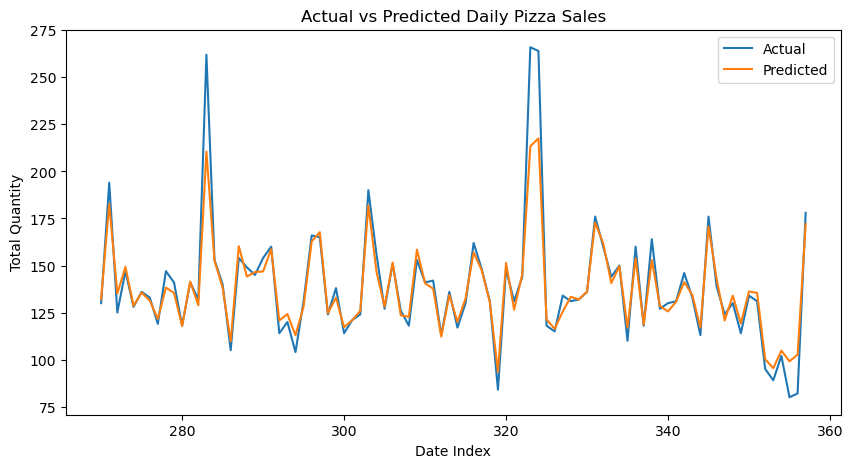

In [79]:
#Plot actual vs predicted for last fold

plt.figure(figsize=(10,5))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, preds, label='Predicted')
plt.xlabel("Date Index")
plt.ylabel("Total Quantity")
plt.title("Actual vs Predicted Daily Pizza Sales")
plt.legend()
plt.show()

In [124]:
import tkinter as tk
from tkinter import ttk
import mysql.connector
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Connect to your database (update credentials)
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="123456",
    database="pizzahut"
)

# Fetch popular pizzas
query_popular = """
SELECT
    pt.name,
    SUM(od.quantity) AS total_quantity
FROM orders_details od
JOIN pizzas p ON od.pizza_id = p.pizza_id
JOIN pizza_types pt ON p.pizza_type_id = pt.pizza_type_id
GROUP BY pt.name
ORDER BY total_quantity DESC
LIMIT 5;
"""
popular_pizzas = pd.read_sql(query_popular, conn)

# Fetch pizza details for content-based recommendations
query_pizzas = "SELECT pizza_type_id, name, category, ingredients FROM pizza_types;"
pizza_df = pd.read_sql(query_pizzas, conn)

conn.close()

# Prepare TF-IDF matrix for similarity
pizza_df['features'] = pizza_df['category'] + " " + pizza_df['ingredients']
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(pizza_df['features'])
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

def get_similar_pizzas(pizza_name, top_n=5):
    pizza_name = pizza_name.strip().lower()  # normalize input
    pizza_df['name_lower'] = pizza_df['name'].str.strip().str.lower()  # normalize df names

    if pizza_name not in pizza_df['name_lower'].values:
        return []
    idx = pizza_df.index[pizza_df['name_lower'] == pizza_name][0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]  # exclude itself
    similar_pizzas = pizza_df['name'].iloc[[i[0] for i in sim_scores]]
    return similar_pizzas.tolist()

# Tkinter UI
root = tk.Tk()
root.title("Pizza Recommendation System")
root.geometry("700x600")
root.configure(bg="#FEEBE7")  # light gray background

# Popular pizzas label and list
tk.Label(root, text="Top 5 Popular Pizzas:", font=("Arial", 16, "bold"), fg="red", bg="white").pack(pady=10)
popular_listbox = tk.Listbox(root, height=6,width=25 ,font=("Arial", 12))
for pizza in popular_pizzas['name']:
    popular_listbox.insert(tk.END, pizza)
popular_listbox.pack(pady=5)

# Dropdown to select pizza
tk.Label(root, text="Select a Pizza to get Similar Recommendations:", font=("Arial", 14, "bold"), fg="red", bg="white").pack(pady=15)

pizza_names = pizza_df['name'].tolist()
selected_pizza = tk.StringVar()
dropdown = ttk.Combobox(root, textvariable=selected_pizza, values=pizza_names, font=("Arial", 12), width=25)
dropdown.pack(pady=5)
dropdown.current(0)  # Set first pizza as default

# Recommendation result label
result_label = tk.Label(root, text="Similar pizzas will appear here.", font=("Arial", 14), fg="red", bg="white", justify="left")
result_label.pack(pady=20)

# Button callback
def show_recommendations():
    pizza = selected_pizza.get()
    pizza = pizza.strip()
    print(f"Selected pizza: '{pizza}'")  # debug print
    if pizza == "":
        result_label.config(text="Please select a pizza.")
        return
    recs = get_similar_pizzas(pizza)
    if not recs:
        result_label.config(text=f"No recommendations found for '{pizza}'.")
    else:
        rec_text = "Similar pizzas:\n" + "\n".join(recs)
        result_label.config(text=rec_text)

# Button with red background and white text
rec_button = tk.Button(root, text="Get Recommendations", command=show_recommendations,
                       bg="red", fg="white", font=("Arial", 25, "bold"), activebackground="#b22222", activeforeground="white")
rec_button.pack(pady=10)

root.mainloop()


C:\Users\babyd\AppData\Local\Temp\ipykernel_11900\3140283888.py:28: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  popular_pizzas = pd.read_sql(query_popular, conn)
C:\Users\babyd\AppData\Local\Temp\ipykernel_11900\3140283888.py:32: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pizza_df = pd.read_sql(query_pizzas, conn)
